<center><h1><b>Numerical Algorithms - 2023/24</b></h1></center>
<center><h3><b>Assignment 1</b></h2></center>
<center><h5><b>Fabian Gobet</b></h5></center>

# 1. Newtons method


## 1.1 Funtion and derivatives


We first start by defining our function of interest and proceed to compute it's first and second derivatives with respect to $x$. Let's consider the function

<br>
$$f(x) = x^3 + x + 1 \tag{1}$$
<br> with first order derivative
<br><br>
$$f'(x) = 3x^2 + 1 \tag{2}$$
<br> and second order derivative
<br><br>
$$f''(x) = 6x \tag{3}$$



## 1.2 Taylor expansion

<br>Let $x_{i}$ be our initial starting point. By the second order taylor expansion of $(1)$, about the point $x_{i}$, we get

$$f(r) \approx f(x_i) + (r - x_i) f'(x_i) + \frac{1}{2} (r - x_i)^2 f''(x_i) (r) \tag{4}$$
<br>
From $(4)$ we can compute $x_{i+1}$ by finding the root whilst solving for $r$, for both the first and second order taylor expansion, using $(1)$, $(2)$ and $(3)$, respectively
<br><br>
$$x_{i+1} = x_{i} + \frac{f(x_{i})}{f'(x_{i})} \tag{5}$$
<br>
$$x_{i+1} = x_{i} + \frac{-b \pm \sqrt{b^2 -4ac}}{2a} \tag{6}$$
where <br>
$$a = \frac{f''(x_{i})}{2}, \quad b= f'(x_{i})-x_{i}f''(x_{i}), \quad c= f(x_{i})-x_{i}f'(x_{i})+\frac{x_{i}^2f''(x_{i})}{2}$$

## 1.3 Real Solution

From Mathematica, WolframAlpha, we can find the real solution to later use it as a way to compute the absolute values of error.<br><br>

<center><table>
    <tr>
        <td><img src="https://drive.google.com/uc?export=view&id=1UpatxbtGl_QW5KLu_uMyte922YyUiBCr" width="400" alt="Image Description 1"></td>
        <td><img src="https://drive.google.com/uc?export=view&id=1LigMwAR9JO6RMHgSu5u74esLdNiAXbn_" width="400" alt="Image Description 2"></td>
    </tr>
</table></center>


# 2. Python


## 2.1 Defining the core code

For this python script we'll be using the math and matplotlib librabries

In [12]:
import math
import matplotlib.pyplot as plt

We first define the function and its derivatives, and the real solution

In [11]:
def f(x):
    return x ** 3 + x + 1

def d1f(x):
    return 3 * x ** 2 + 1

def d2f(x):
    return 6*x

c_val = math.sqrt(93)-9
root = math.pow(c_val/2,1/3)/(math.pow(3,2/3)) - math.pow(2/(3*c_val),1/3)

Then, we define the first and second order variants to generate $x_{i+1}$

In [7]:

def first_order_get_next_xi(x):
    return x - f(x) / d1f(x)

def second_order_get_next_xi(x):
     d0 = f(x)
     d1 = d1f(x)
     d2 = d2f(x)

     a = d2 / 2
     b = d1 - x * d2
     c = d0 - x * d1 + (d2 * x**2)/2

     discr = b**2 - 4*a*c

     sqt = math.sqrt(discr)
     neg = -(b + sqt)/(2*a)
     pos = -(b - sqt)/(2*a)

     return neg if abs(x-neg)<abs(x-pos) else pos


And lastly, we define the algorithm using both the first order and second order expansion, side by side for comparison, with an in put of an initial guess and the number of steps

In [72]:
def newton_steps(initialguess, numsteps):
    firstorder, secondorder = [[initialguess, initialguess-root]], [[initialguess, initialguess-root]]
    first,second = initialguess, initialguess
    for i in range(numsteps):
        first = first_order_get_next_xi(first)
        second = second_order_get_next_xi(second)
        firstorder.append([first, first-root])
        secondorder.append([[second],second-root])

    x = list(range(numsteps+1))
    plt.yscale('symlog', linthresh=1/10000)
    plt.plot(x, [i[1] for i in firstorder], label='Errors (First order)', marker='o', color='blue')
    plt.plot(x, [i[1] for i in secondorder], label='Errors (Second order)', marker='x', color='green')
    plt.legend()
    plt.show()

## 2.2 Case example

In this first example we will set initial guess to $-0.7$ with 10 steps

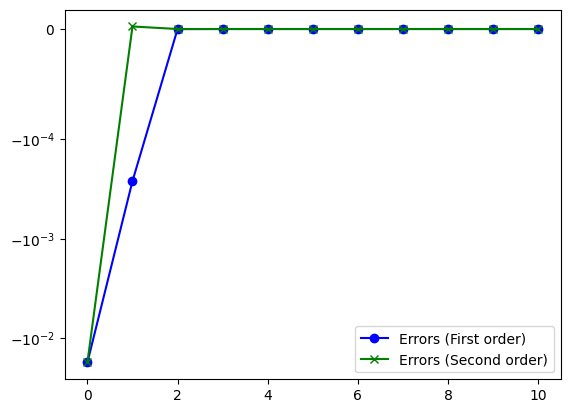

In [73]:
newton_steps(-0.7,10)

For the second example we will be getting an exception. this happens because the binomial discriminant for the second order expansion is negative, which in turn means there are no real solutions for the square root.

In [74]:
newton_steps(0.1,10)

ValueError: ignored

A good workaround fot this would be to implement a combination of the first and second order expansions, allowing the faster convergance of the scond order, except in for the case of a negative bonomial discriminant.